In [1]:
import pandas as pd

mmp_data = pd.read_excel('MMP_transactionDatewise.xlsx')
mmp_data = mmp_data[:-19] # This step is done to remove the discrepancy in the data.
mmp_data.head()

,STDDate,Project Name,State,Standard Service,TotalCount,Transaction(in Lakhs)
0,2013-01-01,Agriculture,Maharashtra,Agriculture & Allied,1599,0.01599
1,2013-01-01,Agriculture,Odisha,Licenses and Permits,1,0.00001
2,2013-01-01,Agriculture,Uttar Pradesh,Agriculture & Allied,98,0.00098
3,2013-01-01,Agriculture,West Bengal,Licenses and Permits,9,0.00009
4,2013-01-01,Commercial Taxes,Andhra Pradesh,Commercial Tax,62205,0.62205


In [2]:
education = {'Date': [], 'Count': []}
for i in range(0, len(mmp_data)):
    if (mmp_data['Project Name'][i] == 'CSC' and
       mmp_data['Standard Service'][i] == 'Education'):
        if (len(education['Date']) == 0 or
           education['Date'][-1] != mmp_data['STDDate'][i]):
            education['Date'].append(mmp_data['STDDate'][i])
            education['Count'].append(mmp_data['TotalCount'][i])
        else:
            education['Count'][-1] += mmp_data['TotalCount'][i]

In [3]:
education_data = pd.DataFrame(data=education)
education_data.head()

,Date,Count
0,2013-01-01,4
1,2013-01-03,2
2,2013-01-04,6
3,2013-01-07,1
4,2013-01-09,1


In [5]:
education_data.index = education_data.Date
education_data.drop('Date', axis=1, inplace=True)

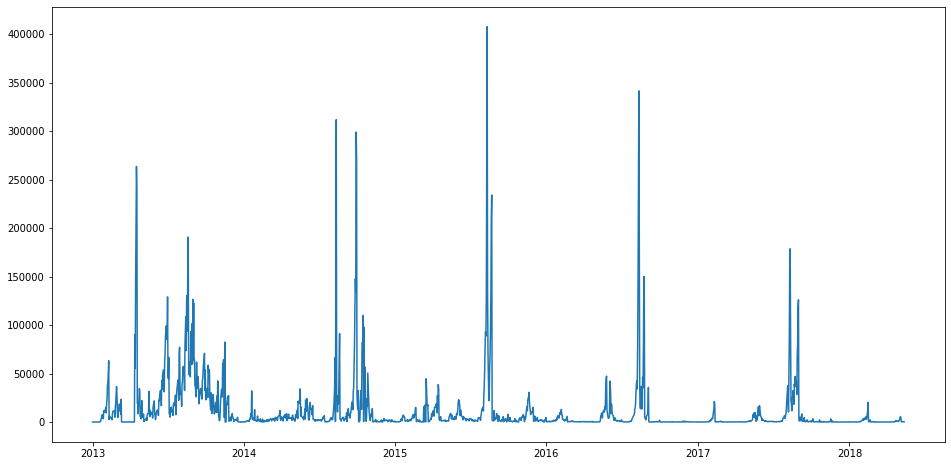

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(education_data)

In [7]:
print(len(education_data))

1936


Trying LSTM.
Will use the last 60 values to predict the next value
train will form 0.66 of the total data

In [8]:
# Test train split.
train_size = int(0.66 * len(education_data))
train, test = education_data.values[:train_size], education_data.values[train_size:]
print(len(train))
print(len(test))
assert len(train) + len(test) == len(education_data)

1277
659


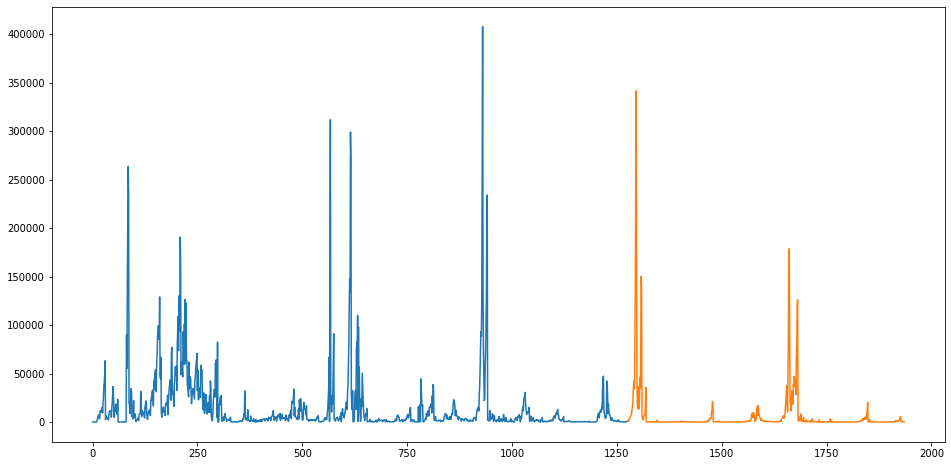

In [9]:
plt.figure(figsize=(16, 8))
plt.plot(train)
plt.plot([None for x in train] + [x for x in test])

In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(education_data.values)
scaled_data

array([[7.36089744e-06],
       [2.45363248e-06],
       [1.22681624e-05],
       ...,
       [8.80854060e-04],
       [5.79057265e-04],
       [6.01139958e-04]])

In [47]:
import numpy as np
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i - 60: i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("Shape of x train", x_train.shape)
print("Shape of y train", y_train.shape)

Shape of x train (1217, 60)
Shape of y train (1217,)


In [49]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1217, 60, 1)


In [51]:
# Create the LSTM Network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 94s - loss: 0.0047


In [56]:
x_test = scaled_data[len(scaled_data) - len(test) - 60: len(scaled_data) - len(test)]
y_test = scaled_data[len(scaled_data) - len(test):]

result = []
# print(x_test[0:60].shape)
for i in range(0, len(test)):
    y = model.predict(x_test[i:i+60])
    x_test.append(y)
    result.append(y)
    
# Calculate rms of result and y test after doing inverse transform
# Plot
    

(60, 1)
